# Helper to view Output batch data

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Plotting config for report
# src: https://python4astronomers.github.io/plotting/publication.html
# Set the font size and style
plt.rc('font', size=12)
plt.rc('font', family='sans-serif')
plt.rc('font', serif='Arial')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Set the Seaborn style
sns.set(style="white")
#sns.set_context("paper")

In [3]:
NAME = "batch-2"

base_folder = os.getcwd()
output_folder = os.path.join(base_folder, 'output')
result_folder = os.path.join(output_folder, NAME)

print(f"Reading info of {result_folder}")

Reading info of /home/enrique/Desktop/git-repos/PoF_Simulation_PYTHON/output/batch-2


In [4]:
print("Processing results...")

# Read mean-result csv:
mean_result_csv = os.path.join(result_folder, 'output-result.csv')
df_mean_result = pd.read_csv(mean_result_csv)
print("Mean results of batch execution:")
print(df_mean_result.T)
print("-------")    


Processing results...
Mean results of batch execution:
                                       0
small_cell_ocupacy              4.937705
small_cell_overflow             5.422951
small_cell_consumption[W]       4.209508
throughput[mbps]             2291.925806
throughput_no_battery[mbps]  1109.369538
throughput_only_macro[mbps]    58.116293
battery_mean[Ah]                3.282302
NMacroCells                     3.000000
NFemtoCells                    20.000000
per_served_femto               26.524600
per_in_area                    27.986800
per_time_served                46.878800
-------


Batch execution with 5 simulations


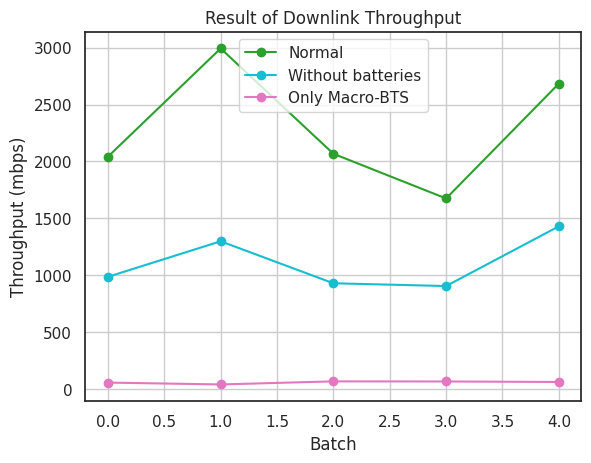

----
% of time served by a femto-Cell: 
0    23.115
1    35.443
2    29.377
3    17.016
4    27.672
Name: per_served_femto, dtype: float64 

% of time in area of femto-Cell: 
0    24.492
1    37.016
2    30.721
3    18.525
4    29.180
Name: per_in_area, dtype: float64 

% of time in area of femto-Cell, and served by femto-Cell: 
0    42.203
1    54.387
2    47.373
3    42.309
4    48.122
Name: per_time_served, dtype: float64 

----
Remaining batteries: 20
END


In [7]:

# Read simulations means and show plot
output_simulations_csv = os.path.join(result_folder, 'output-simulations.csv')
df_simulations = pd.read_csv(output_simulations_csv)
print(f"Batch execution with {df_simulations.shape[0]} simulations")

### Plotting
# 1. Plot Throughput Downlink
traces = []
traces.append(df_simulations['throughput[mbps]'])
traces.append(df_simulations['throughput_no_battery[mbps]'])
traces.append(df_simulations['throughput_only_macro[mbps]'])
x = range(0,df_simulations.shape[0])
plt.plot(x, traces[0], '-o', label='Normal', color='tab:green')
plt.plot(x, traces[1], '-o', label='Without batteries', color='tab:cyan')
plt.plot(x, traces[2], '-o', label='Only Macro-BTS', color='tab:pink')
plt.xlabel('Batch')
plt.ylabel('Throughput (mbps)')
plt.title('Result of Downlink Throughput')
plt.grid()
plt.legend()
plt.show()

# 2. Show Percentages
print("----")
print(f"% of time served by a femto-Cell: \n{df_simulations['per_served_femto'].T} \n" )
print(f"% of time in area of femto-Cell: \n{df_simulations['per_in_area'].T} \n" )
print(f"% of time in area of femto-Cell, and served by femto-Cell: \n{df_simulations['per_time_served'].T} \n" )
print("----")

# 3. Show remaining batt
try:
    plt.plot(x, df_simulations['remaining_batt'], '-o', label='Battery', color="tab:red")
    plt.xlabel('Batch')
    plt.ylabel('Batteries')
    plt.title('Number of remaining batteries before end simulation')
    plt.grid()
    plt.legend()
    plt.show()
except:
    print("Remaining batteries: 20")

print("END")